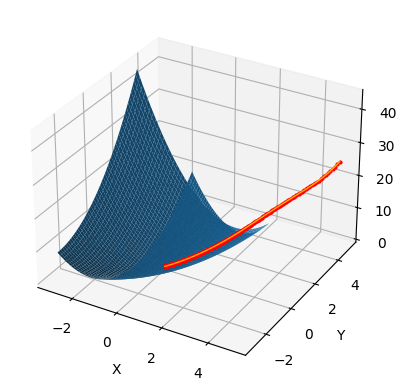

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import axes3d


# x_0       = init
# x_{k + 1} = x_k + alpha * p_{k}
# x_{k + 1} = x_k - alpha * nabla(f(x_k))

# let  f(x, y)        = (y * x^2)
# then nabla(f(x, y)) = [2 * y * x, x^2]
# let alpha           = 0.001
# let x_0, y_0        = [1, 1]

# TODO: make nabla(x, y) for general

def f(x, y):
    return x ** 2 + (x - y) ** 2


def nabla(x, y):
    return [(2 * x + 2 * (x - y)), (-2 * (x - y))]


points = [[5.0, 5.0]]
alpha = 0.01

for i in range(1, 10000):
    a = nabla(points[i - 1][0], points[i - 1][1])[0]
    b = nabla(points[i - 1][0], points[i - 1][1])[1]
    c = points[i - 1][0] - a * alpha
    d = points[i - 1][1] - b * alpha
    points.append([c, d])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.01)
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

X1 = [p[0] for p in points] # x-овые координаты точек GD
Y1 = [p[1] for p in points] # y-овые координаты точек GD
Z1 = [f(p[0], p[1]) for p in points] # Z = f(X, Y), где X и Y - координаты точек GD
ax.plot(X1, Y1, Z1, '.', color='red', zorder=4, markersize=4) # рисуем точки GD цвета red
ax.plot(X1, Y1, Z1, linewidth=1, color='orange', zorder=4) # соединяем точки линиями ширины 0.5 и цвета orange

plt.show()
